<h1>Tâche 8 : Bandes électroniques</h1>
<p>Dans ce Jupyter Notebook, nous allons télécharger  la structure de bandes électroniques du matériau ScNiSb <code>mp-3432</code>. </p>
<p>Ensuite, nous allons analyser la structure de bande : </p>
<ul>
  <li>
    déterminer la bande interdite
    
  </li>
  <li>
    trouver la direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion
  </li>
  <li>
    trouver la direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion
  </li>
  <li>
      calculer la masse effective au sommet de la dernière bande de valence
  </li>
  <li>
      calculer la masse effective à la base de la première bande de conduction
  </li>
    
</ul>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
my_user_api_key = "RoIT1CX7DvB59O2S" # Materials Project legacy API key
m = MPRester(api_key=my_user_api_key)
structure = m.get_structure_by_material_id("mp-3432")

bandstruct = m.get_bandstructure_by_material_id("mp-3432")


BSPlot = BSPlotter(bandstruct)

#BSPlot.plot_brillouin()

<h2> Bande interdite </h2>
<p>La bande interdite est l'intervalle ne possédant pas de niveaux d'énergies électroniques.</p>
<p>La largeur de la bande interdite est de 0.2679 eV, en passant du point $\Gamma$ au point X.</p>
    
<p>On remarque que la bande interdite est indirecte. En effet, avec le graphique affiché on remarque que le pic de la bande de valence n'est pas aligné avec le minmum de la bande de conduction.</p>

{'direct': False, 'energy': 0.2679, 'transition': '\\Gamma-X'}


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

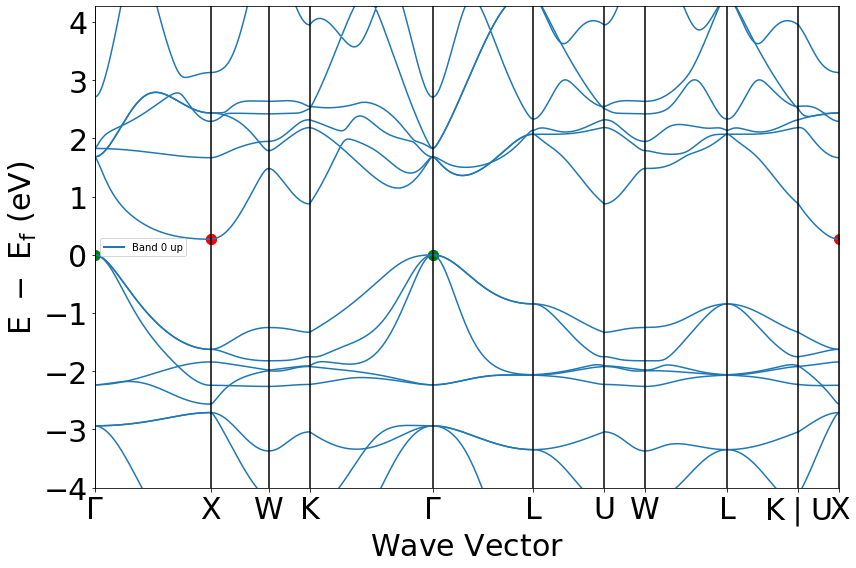

In [6]:
print(bands.get_band_gap())
BSPlot.get_plot(vbm_cbm_marker=True)

<h2> Dispersion </h2>

Nous calculons ici la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

Nous avons 3 courbes d'Energies atteignant le pic de la bande de Valence. En conséquence, nous calculons les directions des 3 courbes et prenons les maximums et minimum respectifs. Ainsi, la courbe numérotée 13 présente les maximums et minimums globaux de Valence.

Nos calculs se font en approximant la dérivée de ces courbes par une dérivée cacluclée numériquement. Ainsi les résultats sont proches des résultats exacts mais pas égaux.

On remarque que nos indices où la dispersion est maximale correspondent respectiement au maximum de Valence et au minimum de conduction.

defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
 Les courbes d'Energies contiennent l'énergie maximale de la bande de valence
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
 Les courbes d'Energies contiennent l'énergie minimale de la bande de conduction
La dernière bande de valence (n°13) posède son maximum de dispersion à l'indice 4 dans la direction Γ-L
La dernière bande de valence (n°13) posède son minimum de dispersion à l'indice 7 dans la direction W-L
La première bande de conduction (n°16) posède son maximum de dispersion à l'indice 1 dans la direction X-W
La première bande de conduction (n°16) posède son minimum de dispersion à l'indice 4 dans la direction Γ-L


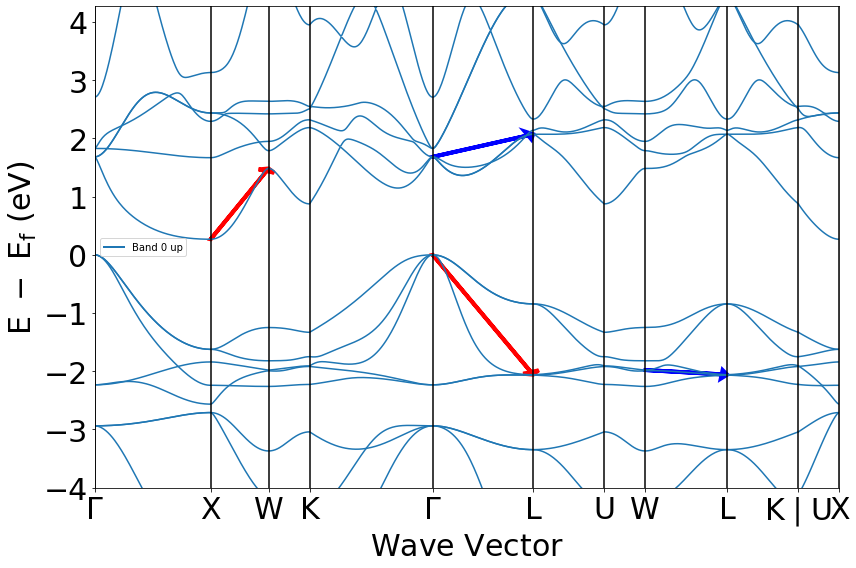

In [31]:
plotter = BSPlotter(bandstruct)
plot = plotter.get_plot()

data = plotter.bs_plot_data()
Energies = data.get('energy').get('1')

print(str(bandstruct.get_vbm()['band_index']))
print(""" Les courbes d'Energies contiennent l'énergie maximale de la bande de valence""")
print(str(bandstruct.get_cbm()['band_index']))
print(""" Les courbes d'Energies contiennent l'énergie minimale de la bande de conduction""".format(bandstruct.get_cbm()['band_index']))


absc_dupl = data.get('ticks').get('distance')
absc = [] # On retire les doublons des abscisses considérées.
for i in range(len(absc_dupl)):
    if absc_dupl[i] not in absc:
        absc.append(absc_dupl[i])
absc = np.array(absc)


deltaX = absc[1:] - absc[0:-1]

minVal = 10000
maxVal = 0
minCond = 10000
maxCond = 0
minIndexVal, maxIndexVal, minIndexCond, maxIndexCond = 0, 0, 0, 0


for i in range(len(deltaX)):
    slopev13 = abs((Energies[i][13][-1] - Energies[i][13][0])/deltaX[i])
    slopev14 = abs((Energies[i][14][-1] - Energies[i][14][0])/deltaX[i])
    slopev15 = abs((Energies[i][15][-1] - Energies[i][15][0])/deltaX[i])
    
    slopevmax = max(slopev13,slopev14,slopev15) #On récupère la valeur maximale de la bande de valence
    if slopevmax >= maxVal: 
        maxVal = slopevmax
        maxIndexVal = i
        
    slopevmin = min(slopev13,slopev14,slopev15)
    if slopevmin <= minVal:
        minVal = slopevmin
        minIndexVal = i
    
    slopec = abs((Energies[i][16][-1] - Energies[i][16][0])/deltaX[i])
    if slopec >= maxCond: 
        maxCond = slopec
        maxIndexCond = i
    if slopec <= minCond: 
        minCond = slopec
        minIndexCond = i  

print("La dernière bande de valence (n°13) posède son maximum de dispersion à l'indice", maxIndexVal, "dans la direction Γ-L") 

print("La dernière bande de valence (n°13) posède son minimum de dispersion à l'indice", minIndexVal, "dans la direction W-L") 

print("La première bande de conduction (n°16) posède son maximum de dispersion à l'indice", maxIndexCond,"dans la direction X-W") 

print("La première bande de conduction (n°16) posède son minimum de dispersion à l'indice", minIndexCond,"dans la direction Γ-L")


# Plus petite dispersion, bande de valence
plt.arrow(absc[minIndexVal],
          Energies[minIndexVal][13][0],
          absc[minIndexVal +1]-absc[minIndexVal],
          Energies[minIndexVal][13][-1]-Energies[minIndexVal][13][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)

# Plus grande dispersion, bande de valence
plt.arrow(absc[maxIndexVal],
          Energies[maxIndexVal][13][0],
          absc[maxIndexVal +1]-absc[maxIndexVal],
          Energies[maxIndexVal][13][-1]-Energies[maxIndexVal][13][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)

# Plus petite dispersion, bande de conduction
plt.arrow(absc[minIndexCond],
          Energies[minIndexCond][16][0],
          absc[minIndexCond +1] - absc[minIndexCond],
          Energies[minIndexCond][16][-1]-Energies[minIndexCond][16][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)

# Plus grande dispersion, bande de conduction
plt.arrow(absc[maxIndexCond],
          Energies[maxIndexCond][16][0],
          absc[maxIndexCond +1]-absc[maxIndexCond],
          Energies[maxIndexCond][16][-1]-Energies[maxIndexCond][16][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)



plt.show()

<h2> Bande interdite </h2>
    
Pour calucler la masse effective, nous utilisons l'équation : $m^* = \hbar^2 * \frac{d^2E}{dk^2}^{-1}$, où  $\hbar$ est la contante réduite de Planck égale à $6.582 \times 10^{−16} eV$.

Nous faisons l'hypothèse que, lorque nous sommes proches du minmima de Conduction et maxima de Valence, $E(k) = A k^2 + Bk + C$, l'équation de la masse effective $m^*$ peut s'écrire alors $m^* = \frac{\hbar^2}{2A}$.

Numériquement, nous faisons une interpolation de l'énergie. Par exemple le maximum de la bande de valence vaut $E(k) = (\epsilon_1-\epsilon_{max}) \frac{(k-k_{max})^2}{(k_1-k_{max})^2}$, avec $\epsilon_{max}$ l'énergie maximale de la parabole, $k_{max}$ l'indice associé et $\epsilon_{1}$ l'énergie de l'autre point le l'interpolation $k_{1}$.

Cela nous donne comme masse effective  $m^* = \frac{\hbar^2}{2} *  \frac{(k_1-k_{max})^2}{\epsilon_1-\epsilon_{max}}$. 

Le même raisonnement peut être fait pour le minimum de la bande de conduction.

La Masse effective au sommet de la bande de valence = -4.65996641091266e-103[kg]

La Masse effective au minimum de la bande de conduciton = 1.6878512951130645e-102[kg]

On remarque que la masse effective peut être négative.

La Masse effective au sommet de la bande de valence = -4.65996641091266e-103[kg]
La Masse effective au minimum de la bande de conduciton = 1.6878512951130645e-102[kg]


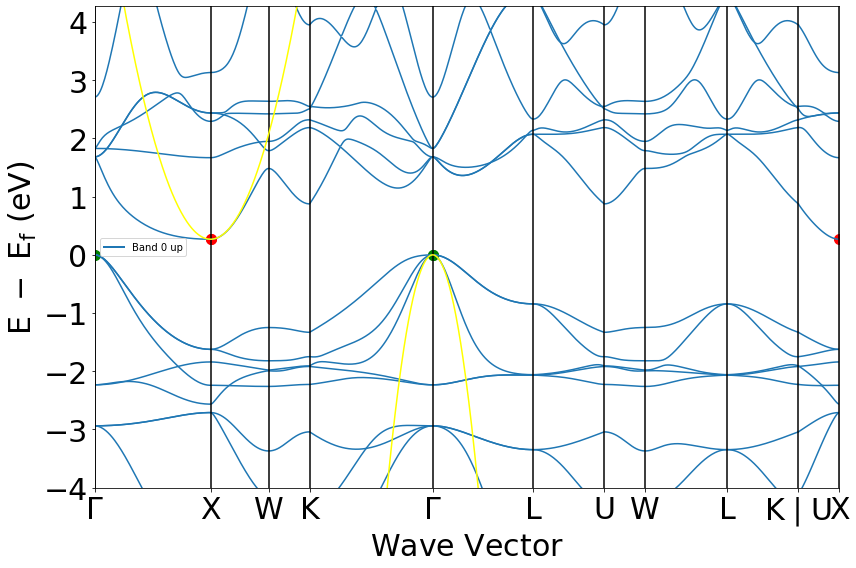

In [35]:
hbar = 6.62607015e-34/(2*np.pi)
eV = 1.602176634e-19
A = 1e-10

dist = data.get('distances')

####################
# Bande de Valence #
####################
mEffectiveVal = (hbar**2) * 0.5 * (1/(Energies[maxIndexVal][13][3])*eV*A**2/((dist[maxIndexVal][3]-absc[maxIndexVal])**2))
print("La Masse effective au sommet de la bande de valence = {}[kg]".format(mEffectiveVal))


#######################
# Bande de Conduction #
#######################
mEffectiveCond = (hbar**2) * 0.5 * (1/(Energies[maxIndexCond][16][3]-Energies[maxIndexCond][16][0])*eV*A**2/((dist[maxIndexCond][3]-absc[maxIndexCond])**2))
print("La Masse effective au minimum de la bande de conduciton = {}[kg]".format(mEffectiveCond))


#######################
# Graphique           #
#######################
interpolationdomain = np.linspace(dist[0][0], dist[9][-1], 1000)

kVal = [2*absc[maxIndexVal]-dist[maxIndexVal][3], absc[maxIndexVal], dist[maxIndexVal][3]]
EVal = [Energies[maxIndexVal][13][3], Energies[maxIndexVal][13][0], Energies[maxIndexVal][13][3]]
interpolationVal = np.polyfit(kVal, EVal, 2) 

kCond = [2*absc[maxIndexCond]-dist[maxIndexCond][3], absc[maxIndexCond], dist[maxIndexCond][3]]
ECond = [Energies[maxIndexCond][16][3], Energies[maxIndexCond][16][0], Energies[maxIndexCond][16][3]]
interpolationCond = np.polyfit(kCond, ECond, 2)

plotter.get_plot(vbm_cbm_marker=True)
plt.plot(interpolationdomain, np.polyval(interpolationVal, interpolationdomain), 'yellow')
plt.plot(interpolationdomain, np.polyval(interpolationCond, interpolationdomain), 'yellow')

<h2>Bibliographie</h2>
<ul>
  <li>
    LMAPR1492 - Physique des Matériaux
    
  </li>
  <li>
    <a href="https://www.youtube.com/@Niavem/playlists">Chaîne YouTube de Niavem</a> -
    CHaines contenant des cours vidéos sur la cristallographie.
  </li>
  <li>
    <a href="https://materialsproject.org/">Materials Project</a> -
    Base de données en ligne contenant des informations sur les propriétés des matériaux.
  </li>
</ul> 